<a href="https://colab.research.google.com/github/shruti-sharma12/CV-lab/blob/main/cv(expt5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: SHRUTI SHARMA

PRN:1032211936

EXPERIMENT 5

PART A (Matching)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow

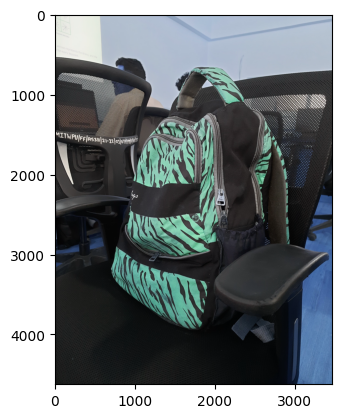

In [ ]:
image1=cv2.imread('image1.jpg')
plt.imshow(image1)

In [ ]:
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)

In [ ]:
image1

array([[215, 215, 218, ..., 195, 194, 193],
       [215, 214, 217, ..., 197, 197, 196],
       [215, 213, 215, ..., 200, 200, 200],
       ...,
       [ 19,  22,  25, ..., 138, 141, 144],
       [ 20,  22,  25, ..., 139, 143, 145],
       [ 21,  22,  25, ..., 139, 143, 145]], dtype=uint8)

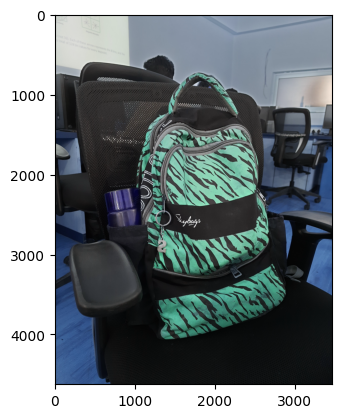

In [ ]:
image2=cv2.imread('image2.jpg')
plt.imshow(image2)

In [ ]:
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

In [ ]:
image2

array([[205, 209, 209, ..., 169, 169, 169],
       [205, 210, 210, ..., 169, 169, 169],
       [207, 210, 210, ..., 170, 170, 170],
       ...,
       [104, 111, 113, ...,  17,  24,  30],
       [107, 113, 115, ...,  14,  18,  23],
       [110, 116, 117, ...,   9,  10,  12]], dtype=uint8)

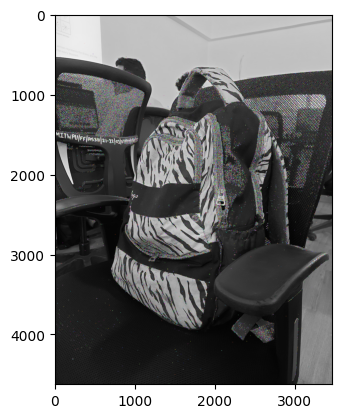

In [ ]:
#sift of image 1
sift= cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
img_1 = cv2.drawKeypoints(image1,keypoints_1,image1)
plt.imshow(img_1)

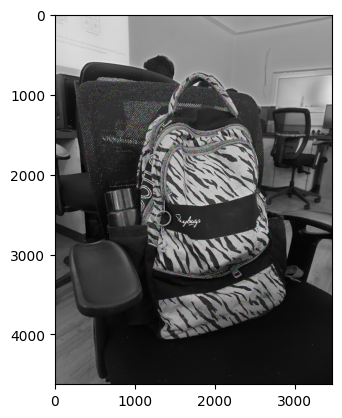

In [ ]:
#sift of image 2
sift=cv2.xfeatures2d.SIFT_create()
keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)
img_2 = cv2.drawKeypoints(image2,keypoints_2,image2)
plt.imshow(img_2)

In [ ]:
len(keypoints_1),len(keypoints_2)

(54228, 20508)

In [ ]:
#Feature matching
bf=cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
matches=bf.match(descriptors_1,descriptors_2)
matches=sorted(matches, key= lambda x:x.distance)

In [ ]:
len(matches)

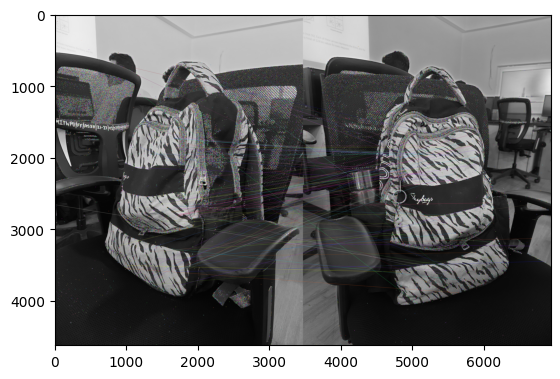

In [ ]:
img3=cv2.drawMatches(img_1,keypoints_1,img_2,keypoints_2,matches[:100],img_2,flags=2)

In [ ]:
plt.imshow(img3)

PART B (TRANSFORMATION)

In [ ]:
#Extract matches keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [ ]:
#prespective transformation
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

In [ ]:
M

array([[ 3.48840567e-02, -6.63918406e-01,  1.15542409e+03],
       [ 6.78005667e-02, -1.31415641e+00,  2.28734304e+03],
       [ 2.90328900e-05, -5.74090314e-04,  1.00000000e+00]])

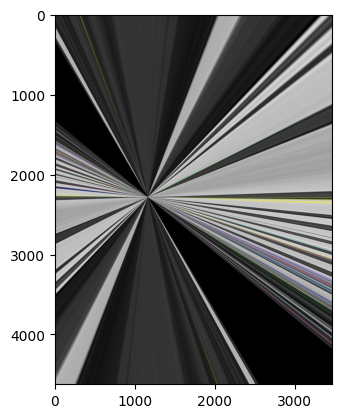

In [ ]:
#apply prespective transformation
newImage1 = cv2.warpPerspective(img_1, M, dsize=(img_2.shape[1], img_2.shape[0]))

In [ ]:
plt.imshow(newImage1)

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Ref')

plt.subplot(1, 3, 3)
plt.imshow(newImage1)
plt.title('Final')